In [186]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Time step in sec
dt = 2.
# Interval of time steps
#skip = 300
# Number of stations
#nstae = 588
plt.rcParams['figure.figsize'] = [10, 5]

file1 = '../Ike-eirik/fort.61'
file2 = '../Ike-fin/fort.61'
file3 = '../Ike-noswan/fort.61'
file4 = '../120-swan/fort.61'

# Select the desired station


def getStation(file1, st, skip, dt):
    elev1 = []
    

    with open(file1) as f1:
        l1 = f1.readline()
        l1 = f1.readline()

        for lineno, line in enumerate(f1):
            lines = line.split()
            if lines[0] == str(st):
                elev1.append(float(lines[1]))

    time = np.arange(len(elev1))*dt*skip/86400.

    return time, np.array(elev1)



In [182]:
gauges = {
    2:("pier_21", "Galveston Pier 21"),
    56: ("uss_lexington", "USS Lexington"),
    162: ("south_bird", "South Bird Island"),
    52: ("north_jetty", "Galveston Entrance North Jetty"),
    3: ("pleasure_pier", "Galveston Pleasure Pier"),
    80: ("sss_tx_har_002", "SSS-TX-HAR-002"),
    33: ("port_aransas", "Port Aransas"),
    161: ("bob_hall", "Bob Hall Pier"),
    126: ("lamarque_pump", "La Marque Pump Station")
}

def getGauge(gauge, dt=3600, offset=12):
    elev = []
    file = "/workspace/chg/gauges/" + gauges[gauge][0] + ".csv"
    with open(file) as f1:
        l1 = f1.readline()
        for lineno, line in enumerate(f1):
            lines = line.split(',')
            if lines[-1] == '\"-\"\n':
                break

            elev.append(float(lines[-1][1:-2]))

    elev = elev[offset:]
    time = np.arange(len(elev))*dt/86400.
    return time, elev



In [211]:
st = 56
t1,e1 = getStation(file1, st, skip, 2.)
t2,e2 = getStation(file2, st, skip, 2.)
t3,e3 = getStation(file3, st, skip, 1.)
t4,e4 = getStation(file4, st, skip, 2.)
#t4,e4 = getGauge(st)



Text(0.5, 1.0, 'USS Lexington')

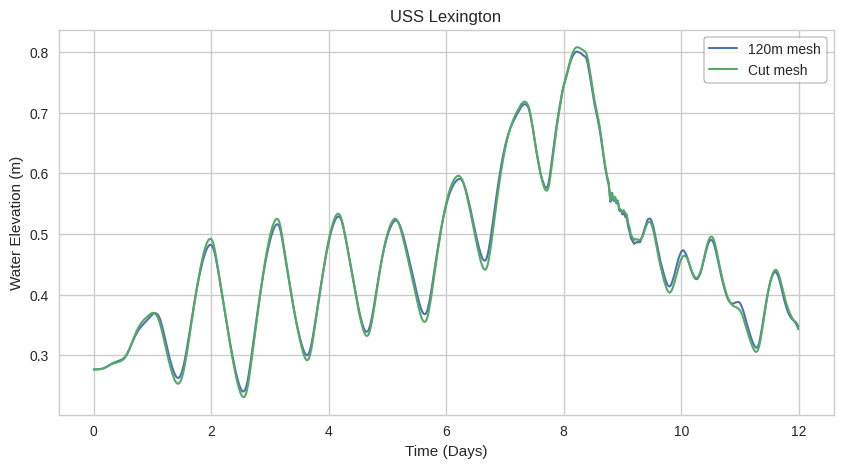

In [212]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['lines.linewidth'] = 1.5
f = plt.figure()
plt.plot(t1, e1, label='120m mesh')
plt.plot(t2, e2, label='Cut mesh')
#plt.plot(t3, e3, label='2008 mesh (no advection)')
#plt.plot(t4, e4, linestyle='--', label='120m mesh + SWAN')
#plt.plot(t4, e4, linestyle='--', color='darkorange', label='Gauge data')

plt.xlabel('Time (Days)')
plt.ylabel('Water Elevation (m)')
plt.legend(frameon=True, edgecolor="black")
plt.title(gauges[st][1])

In [185]:
f.savefig('lamarque_pump.png', dpi=300)

In [97]:
gauges[52]

'north_jetty'

In [143]:
plt.rcParams.update(plt.rcParamsDefault)